In [247]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
import numpy as np
import pandas as pd

In [249]:
from utils import read_dataset

In [250]:
from rankers import FeatureFilter

In [251]:
FILENAME = "/home/howl/Code/IA/data/test/dataset_adrenal_dahia.txt"
dataset = read_dataset(FILENAME)

In [378]:
ranker_methods = ["reliefF", "fisher"]
ff = FeatureFilter(ranker_methods, score_threshold=0.2)

In [379]:
ff.evaluate_rankers(dataset)

In [380]:
ff.normalize()

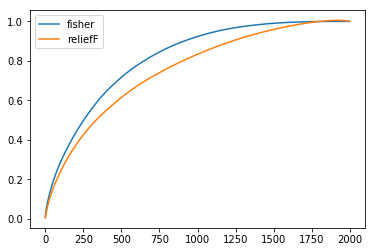

In [381]:
ff.plot()

In [382]:
b = ff.filter_features()

In [383]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

In [384]:
from ga import Individual
from ga import GeneticAlgorithm

In [385]:
import warnings
warnings.filterwarnings("ignore")

In [386]:
def test_method(features, dataset):
    Individual.Configure(features, dataset.X, dataset.y, LinearSVC())
    results = []
    for i in range(20):
        g = GeneticAlgorithm(generations=30, population_size=30)
        g.run()
        fittest = g.population[0]
        results.append(fittest.fitness)
    print("Media de Fitness: ", np.mean(results))

In [ ]:
test_method(b[0], dataset)

In [ ]:
test_method(b[1], dataset)

In [ ]:
test_method(np.union1d(b[0], b[1]), dataset)

In [347]:
Individual.Configure(np.union1d(b[0], b[1]), dataset.X, dataset.y, LinearSVC())
#Individual.Configure(b[1], dataset.X, dataset.y, LinearSVC())

In [348]:
i = Individual(np.ones(Individual.dna_size, dtype="bool"))

In [349]:
i.fitness

0.5418706450016035

In [356]:
g = GeneticAlgorithm(generations=30, population_size=30)

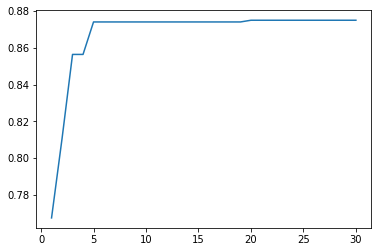

In [357]:
r = g.run()

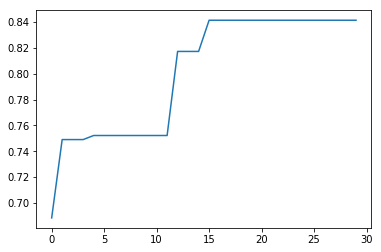

In [333]:
plt.plot(range(0, g.generations), [re.fitness for re in r] )

In [228]:
prev_dna

In [229]:
for i in g.population:    
    print(i.fitness)
    print(len(i.dna[i.dna==True]))

0.7925149542544591
326
0.7925149542544591
335
0.7925149542544591
329
0.7925149542544591
334
0.7925149542544591
319
0.7925149542544591
327
0.7925149542544591
326
0.7925149542544591
330
0.7925149542544591
318
0.7925149542544591
321
0.7925149542544591
330
0.7925149542544591
325
0.7925149542544591
330
0.7925149542544591
331
0.7925149542544591
334
0.7925149542544591
316
0.7925149542544591
320
0.7925149542544591
325
0.7925149542544591
335
0.7925149542544591
324


In [87]:
g.random_population()

/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/home/howl/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log

In [104]:
s = g.selection()

In [105]:
s

array([<ga.Individual object at 0x7fa8300439b0>,
       <ga.Individual object at 0x7fa8300387b8>], dtype=object)

In [106]:
for i in s:
    print(i.fitness)

0.4602596433307394
0.6187912651992963
0.5446325732352012
0.39827836819922524
0.548074658534131


In [112]:
for i in sorted(s, key=lambda i: i.fitness, reverse=True)[:2]:
    print(i.fitness)

0.6187912651992963
0.548074658534131


In [113]:
i1, i2 = g.selection()

In [116]:
i1.fitness

0.6120174652510326

In [117]:
i2.fitness

0.6058409786654897

In [95]:
Individual.features[:5]

array([ 638, 1823,  590, 1079, 1140])

In [52]:
s[0].dna[:5]

array([False,  True, False,  True,  True])

In [55]:
s[0].fitness[:5]

array([1823, 1079, 1140, 1840, 1932])

In [58]:
s[0].fitness.size

338

In [61]:
dataset.X[:, s[0].fitness].shape

(76, 338)

In [71]:
Individual.configure(b[0])

In [72]:
Individual.dna_size

648

In [74]:
i =Individual.Random()

In [82]:
n = np.array(Individual.filtered_features)

In [86]:
len(n)

648

In [89]:
len(n[i.dna])

298

In [64]:
6//2

3